# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile


cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num


if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)


if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()
        


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [05:22, 529KB/s]                                

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


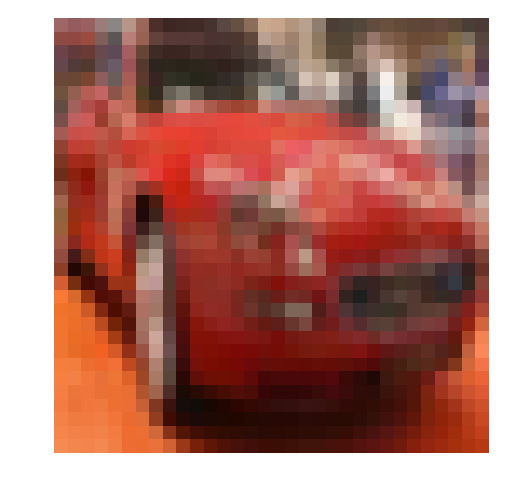

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    x_norm = x  / 255.0
    return x_norm


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [4]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    
    labels = np.zeros((len(x), 10), dtype = np.int)
    
    for i in range(len(x)):
        labels[i, x[i]] = 1
    
    return labels

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    x = tf.placeholder(tf.float32, shape = (None, image_shape[0], image_shape[1], image_shape[2]), name = "x")
    return x


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    
    y = tf.placeholder(tf.int64, shape = (None, n_classes), name = 'y')
    return y


def neural_net_keep_prob_input():

    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')
    return keep_prob

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    num_channels = x_tensor.get_shape()[3].value
    
    wShape = [conv_ksize[0], conv_ksize[1], num_channels , conv_num_outputs]
    
    # weight = tf.get_variable('weight', wShape, initializer=tf.contrib.layers.xavier_initializer())
    # bias = tf.get_variable('bias', conv_num_outputs, initializer=tf.contrib.layers.xavier_initializer())
    
    weight = tf.Variable(tf.truncated_normal(shape = wShape))
    bias = tf.Variable(tf.constant(1.0, shape = [conv_num_outputs]))
    
    activations = tf.nn.conv2d(x_tensor, weight, [1, conv_strides[0], conv_strides[1], 1], 'SAME') + bias
    
    activations = tf.nn.sigmoid(activations)

    pool = tf.nn.max_pool(activations, [1, pool_ksize[0], pool_ksize[1], 1], [1, pool_strides[0], pool_strides[1], 1], 'SAME')
    
    return pool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    
    input_shape = x_tensor.get_shape()
    # print (input_shape)
    num_activations = input_shape[1:4].num_elements()
    
    flat = tf.reshape(x_tensor, [-1, num_activations])
    # print (flat.get_shape())
    
    return flat


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    input_dim = x_tensor.get_shape()[1].value
    
    wShape = [input_dim, num_outputs]
    
    
    #weight = tf.get_variable('full_weight', wShape, initializer = tf.contrib.layers.xavier_initializer())
    #bias = tf.get_variable('full_bias', [num_outputs], initializer = tf.contrib.layers.xavier_initializer())
    
    weight = tf.Variable(tf.truncated_normal(shape = wShape))
    bias = tf.Variable(tf.constant(0.0, shape = [num_outputs]))
    
    fc = tf.matmul(x_tensor, weight) + bias
    
    fc = tf.nn.sigmoid(fc)
    
    return fc


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    fc = fully_conn(x_tensor, num_outputs)
    
    return fc


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)

    conv_ksize1 = [5, 5]
    conv_stride1 = [1, 1]
    conv_ksize2 = [5, 5]
    conv_stride2 = [1, 1]
    
    conv_ksize3 = [5, 5]
    conv_stride3 = [1, 1]
    
    conv_num_output1 = 32
    conv_num_output2 = 64
    conv_num_output3 = 128
    
    pool_ksize1 = [2, 2]
    pool_stride1 = [2, 2]
    
    pool_ksize2 = [2, 2]
    pool_stride2 = [2, 2]
    
    pool_ksize3= [2, 2]
    pool_stride3 = [2, 2]
    
    #conv1
    x1 = conv2d_maxpool(x, conv_num_output1, conv_ksize1, conv_stride1, pool_ksize1, pool_stride1)
    x1 = tf.nn.dropout(x1, keep_prob)
    #conv2
    x2 = conv2d_maxpool(x1, conv_num_output2, conv_ksize2, conv_stride2, pool_ksize2, pool_stride2)
    x2 = tf.nn.dropout(x2, keep_prob)
    #conv3
    x3 = conv2d_maxpool(x2, conv_num_output3, conv_ksize3, conv_stride3, pool_ksize3, pool_stride3)
    x3 = tf.nn.dropout(x3, keep_prob)
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    flat = flatten(x3)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    fc1_size = fc2_size = 128
    
    fc1 = fully_conn(flat, fc1_size)
    fc2 = fully_conn(fc1, fc2_size)
    num_outputs = 10
      
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    top = output(fc2, num_outputs)
    
    # TODO: return output
    return top


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    # pass
    session.run([optimizer], feed_dict = {x: feature_batch, y: label_batch, keep_prob: keep_probability})

    return

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    tCost, tAccuracy = session.run([cost, accuracy], feed_dict = {x : feature_batch, y : label_batch, keep_prob : 1})
    print("loss and accuracy: %.4f, %.4f" % (tCost, tAccuracy))
    
    return

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [15]:
# TODO: Tune Parameters
epochs = 3000
batch_size = 256
keep_probability = 0.8

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        
        # if(epoch + 1 == 1 or (epoch + 1) % 50 == 0):
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, valid_features, valid_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  loss and accuracy: 2.3321, 0.1052
Epoch  2, CIFAR-10 Batch 1:  loss and accuracy: 2.3378, 0.1052
Epoch  3, CIFAR-10 Batch 1:  loss and accuracy: 2.3003, 0.1050
Epoch  4, CIFAR-10 Batch 1:  loss and accuracy: 2.3017, 0.1050
Epoch  5, CIFAR-10 Batch 1:  loss and accuracy: 2.3018, 0.1050
Epoch  6, CIFAR-10 Batch 1:  loss and accuracy: 2.3020, 0.1052
Epoch  7, CIFAR-10 Batch 1:  loss and accuracy: 2.3020, 0.1052
Epoch  8, CIFAR-10 Batch 1:  loss and accuracy: 2.3020, 0.1050
Epoch  9, CIFAR-10 Batch 1:  loss and accuracy: 2.3021, 0.1050
Epoch 10, CIFAR-10 Batch 1:  loss and accuracy: 2.3023, 0.1050
Epoch 11, CIFAR-10 Batch 1:  loss and accuracy: 2.3023, 0.1050
Epoch 12, CIFAR-10 Batch 1:  loss and accuracy: 2.3024, 0.1050
Epoch 13, CIFAR-10 Batch 1:  loss and accuracy: 2.3025, 0.1050
Epoch 14, CIFAR-10 Batch 1:  loss and accuracy: 2.3024, 0.1050
Epoch 15, CIFAR-10 Batch 1:  loss and accuracy: 2.3023, 0.1052
Epoch 16, CI

Epoch 130, CIFAR-10 Batch 1:  loss and accuracy: 2.2425, 0.1050
Epoch 131, CIFAR-10 Batch 1:  loss and accuracy: 2.2348, 0.1050
Epoch 132, CIFAR-10 Batch 1:  loss and accuracy: 2.2221, 0.1050
Epoch 133, CIFAR-10 Batch 1:  loss and accuracy: 2.2371, 0.1050
Epoch 134, CIFAR-10 Batch 1:  loss and accuracy: 2.2261, 0.1050
Epoch 135, CIFAR-10 Batch 1:  loss and accuracy: 2.2181, 0.1050
Epoch 136, CIFAR-10 Batch 1:  loss and accuracy: 2.2272, 0.1050
Epoch 137, CIFAR-10 Batch 1:  loss and accuracy: 2.2164, 0.1050
Epoch 138, CIFAR-10 Batch 1:  loss and accuracy: 2.2014, 0.1050
Epoch 139, CIFAR-10 Batch 1:  loss and accuracy: 2.2020, 0.1050
Epoch 140, CIFAR-10 Batch 1:  loss and accuracy: 2.1921, 0.1050
Epoch 141, CIFAR-10 Batch 1:  loss and accuracy: 2.1875, 0.1050
Epoch 142, CIFAR-10 Batch 1:  loss and accuracy: 2.1968, 0.1050
Epoch 143, CIFAR-10 Batch 1:  loss and accuracy: 2.1875, 0.1050
Epoch 144, CIFAR-10 Batch 1:  loss and accuracy: 2.1848, 0.1050
Epoch 145, CIFAR-10 Batch 1:  loss and a

Epoch 258, CIFAR-10 Batch 1:  loss and accuracy: 2.0291, 0.2716
Epoch 259, CIFAR-10 Batch 1:  loss and accuracy: 2.0367, 0.2640
Epoch 260, CIFAR-10 Batch 1:  loss and accuracy: 2.0304, 0.2722
Epoch 261, CIFAR-10 Batch 1:  loss and accuracy: 2.0414, 0.2558
Epoch 262, CIFAR-10 Batch 1:  loss and accuracy: 2.0353, 0.2652
Epoch 263, CIFAR-10 Batch 1:  loss and accuracy: 2.0264, 0.2808
Epoch 264, CIFAR-10 Batch 1:  loss and accuracy: 2.0325, 0.2748
Epoch 265, CIFAR-10 Batch 1:  loss and accuracy: 2.0270, 0.2670
Epoch 266, CIFAR-10 Batch 1:  loss and accuracy: 2.0313, 0.2746
Epoch 267, CIFAR-10 Batch 1:  loss and accuracy: 2.0077, 0.2984
Epoch 268, CIFAR-10 Batch 1:  loss and accuracy: 2.0272, 0.2822
Epoch 269, CIFAR-10 Batch 1:  loss and accuracy: 2.0216, 0.2908
Epoch 270, CIFAR-10 Batch 1:  loss and accuracy: 2.0206, 0.2884
Epoch 271, CIFAR-10 Batch 1:  loss and accuracy: 2.0289, 0.2660
Epoch 272, CIFAR-10 Batch 1:  loss and accuracy: 2.0301, 0.2672
Epoch 273, CIFAR-10 Batch 1:  loss and a

Epoch 386, CIFAR-10 Batch 1:  loss and accuracy: 2.0277, 0.2862
Epoch 387, CIFAR-10 Batch 1:  loss and accuracy: 2.0437, 0.2690
Epoch 388, CIFAR-10 Batch 1:  loss and accuracy: 2.0428, 0.2876
Epoch 389, CIFAR-10 Batch 1:  loss and accuracy: 2.0243, 0.3024
Epoch 390, CIFAR-10 Batch 1:  loss and accuracy: 2.0335, 0.2894
Epoch 391, CIFAR-10 Batch 1:  loss and accuracy: 2.0227, 0.3020
Epoch 392, CIFAR-10 Batch 1:  loss and accuracy: 2.0056, 0.3254
Epoch 393, CIFAR-10 Batch 1:  loss and accuracy: 2.0657, 0.2724
Epoch 394, CIFAR-10 Batch 1:  loss and accuracy: 2.0327, 0.2844
Epoch 395, CIFAR-10 Batch 1:  loss and accuracy: 2.0198, 0.2866
Epoch 396, CIFAR-10 Batch 1:  loss and accuracy: 2.0598, 0.2774
Epoch 397, CIFAR-10 Batch 1:  loss and accuracy: 2.0189, 0.2930
Epoch 398, CIFAR-10 Batch 1:  loss and accuracy: 2.0161, 0.2954
Epoch 399, CIFAR-10 Batch 1:  loss and accuracy: 2.0279, 0.2868
Epoch 400, CIFAR-10 Batch 1:  loss and accuracy: 2.0194, 0.2942
Epoch 401, CIFAR-10 Batch 1:  loss and a

Epoch 514, CIFAR-10 Batch 1:  loss and accuracy: 2.0168, 0.2966
Epoch 515, CIFAR-10 Batch 1:  loss and accuracy: 1.9648, 0.3360
Epoch 516, CIFAR-10 Batch 1:  loss and accuracy: 2.0059, 0.2978
Epoch 517, CIFAR-10 Batch 1:  loss and accuracy: 1.9945, 0.3076
Epoch 518, CIFAR-10 Batch 1:  loss and accuracy: 1.9803, 0.3236
Epoch 519, CIFAR-10 Batch 1:  loss and accuracy: 1.9857, 0.3230
Epoch 520, CIFAR-10 Batch 1:  loss and accuracy: 1.9875, 0.3222
Epoch 521, CIFAR-10 Batch 1:  loss and accuracy: 2.0263, 0.2864
Epoch 522, CIFAR-10 Batch 1:  loss and accuracy: 1.9925, 0.3144
Epoch 523, CIFAR-10 Batch 1:  loss and accuracy: 2.0322, 0.2956
Epoch 524, CIFAR-10 Batch 1:  loss and accuracy: 2.0407, 0.2868
Epoch 525, CIFAR-10 Batch 1:  loss and accuracy: 1.9987, 0.3024
Epoch 526, CIFAR-10 Batch 1:  loss and accuracy: 2.0245, 0.2824
Epoch 527, CIFAR-10 Batch 1:  loss and accuracy: 2.0269, 0.2806
Epoch 528, CIFAR-10 Batch 1:  loss and accuracy: 2.0202, 0.3016
Epoch 529, CIFAR-10 Batch 1:  loss and a

Epoch 642, CIFAR-10 Batch 1:  loss and accuracy: 1.9667, 0.3254
Epoch 643, CIFAR-10 Batch 1:  loss and accuracy: 1.9672, 0.3326
Epoch 644, CIFAR-10 Batch 1:  loss and accuracy: 1.9656, 0.3388
Epoch 645, CIFAR-10 Batch 1:  loss and accuracy: 1.9947, 0.3166
Epoch 646, CIFAR-10 Batch 1:  loss and accuracy: 2.0071, 0.3044
Epoch 647, CIFAR-10 Batch 1:  loss and accuracy: 2.0023, 0.3030
Epoch 648, CIFAR-10 Batch 1:  loss and accuracy: 1.9996, 0.2924
Epoch 649, CIFAR-10 Batch 1:  loss and accuracy: 1.9817, 0.3228
Epoch 650, CIFAR-10 Batch 1:  loss and accuracy: 1.9977, 0.3014
Epoch 651, CIFAR-10 Batch 1:  loss and accuracy: 2.0183, 0.2960
Epoch 652, CIFAR-10 Batch 1:  loss and accuracy: 2.0093, 0.3006
Epoch 653, CIFAR-10 Batch 1:  loss and accuracy: 1.9948, 0.3144
Epoch 654, CIFAR-10 Batch 1:  loss and accuracy: 1.9922, 0.3152
Epoch 655, CIFAR-10 Batch 1:  loss and accuracy: 1.9750, 0.3296
Epoch 656, CIFAR-10 Batch 1:  loss and accuracy: 2.0081, 0.3188
Epoch 657, CIFAR-10 Batch 1:  loss and a

Epoch 770, CIFAR-10 Batch 1:  loss and accuracy: 1.9499, 0.3596
Epoch 771, CIFAR-10 Batch 1:  loss and accuracy: 1.9717, 0.3432
Epoch 772, CIFAR-10 Batch 1:  loss and accuracy: 1.9705, 0.3366
Epoch 773, CIFAR-10 Batch 1:  loss and accuracy: 1.9579, 0.3446
Epoch 774, CIFAR-10 Batch 1:  loss and accuracy: 1.9477, 0.3626
Epoch 775, CIFAR-10 Batch 1:  loss and accuracy: 1.9532, 0.3486
Epoch 776, CIFAR-10 Batch 1:  loss and accuracy: 1.9632, 0.3450
Epoch 777, CIFAR-10 Batch 1:  loss and accuracy: 1.9480, 0.3610
Epoch 778, CIFAR-10 Batch 1:  loss and accuracy: 1.9556, 0.3440
Epoch 779, CIFAR-10 Batch 1:  loss and accuracy: 1.9385, 0.3610
Epoch 780, CIFAR-10 Batch 1:  loss and accuracy: 1.9434, 0.3538
Epoch 781, CIFAR-10 Batch 1:  loss and accuracy: 1.9524, 0.3410
Epoch 782, CIFAR-10 Batch 1:  loss and accuracy: 1.9420, 0.3634
Epoch 783, CIFAR-10 Batch 1:  loss and accuracy: 1.9550, 0.3526
Epoch 784, CIFAR-10 Batch 1:  loss and accuracy: 1.9483, 0.3618
Epoch 785, CIFAR-10 Batch 1:  loss and a

Epoch 898, CIFAR-10 Batch 1:  loss and accuracy: 1.9504, 0.3700
Epoch 899, CIFAR-10 Batch 1:  loss and accuracy: 1.9399, 0.3628
Epoch 900, CIFAR-10 Batch 1:  loss and accuracy: 1.9303, 0.3820
Epoch 901, CIFAR-10 Batch 1:  loss and accuracy: 1.9315, 0.3782
Epoch 902, CIFAR-10 Batch 1:  loss and accuracy: 1.9446, 0.3684
Epoch 903, CIFAR-10 Batch 1:  loss and accuracy: 1.9184, 0.3976
Epoch 904, CIFAR-10 Batch 1:  loss and accuracy: 1.9303, 0.3858
Epoch 905, CIFAR-10 Batch 1:  loss and accuracy: 1.9458, 0.3798
Epoch 906, CIFAR-10 Batch 1:  loss and accuracy: 1.9300, 0.3944
Epoch 907, CIFAR-10 Batch 1:  loss and accuracy: 1.9312, 0.3904
Epoch 908, CIFAR-10 Batch 1:  loss and accuracy: 1.9533, 0.3674
Epoch 909, CIFAR-10 Batch 1:  loss and accuracy: 1.9220, 0.4020
Epoch 910, CIFAR-10 Batch 1:  loss and accuracy: 1.9407, 0.3830
Epoch 911, CIFAR-10 Batch 1:  loss and accuracy: 1.9249, 0.3876
Epoch 912, CIFAR-10 Batch 1:  loss and accuracy: 1.9383, 0.3796
Epoch 913, CIFAR-10 Batch 1:  loss and a

Epoch 1026, CIFAR-10 Batch 1:  loss and accuracy: 1.9392, 0.3848
Epoch 1027, CIFAR-10 Batch 1:  loss and accuracy: 1.9484, 0.3646
Epoch 1028, CIFAR-10 Batch 1:  loss and accuracy: 1.9238, 0.3906
Epoch 1029, CIFAR-10 Batch 1:  loss and accuracy: 1.9443, 0.3782
Epoch 1030, CIFAR-10 Batch 1:  loss and accuracy: 1.9233, 0.3996
Epoch 1031, CIFAR-10 Batch 1:  loss and accuracy: 1.9286, 0.3880
Epoch 1032, CIFAR-10 Batch 1:  loss and accuracy: 1.9138, 0.3950
Epoch 1033, CIFAR-10 Batch 1:  loss and accuracy: 1.9193, 0.3928
Epoch 1034, CIFAR-10 Batch 1:  loss and accuracy: 1.9298, 0.3856
Epoch 1035, CIFAR-10 Batch 1:  loss and accuracy: 1.9108, 0.3990
Epoch 1036, CIFAR-10 Batch 1:  loss and accuracy: 1.9030, 0.3968
Epoch 1037, CIFAR-10 Batch 1:  loss and accuracy: 1.9081, 0.4000
Epoch 1038, CIFAR-10 Batch 1:  loss and accuracy: 1.9182, 0.3904
Epoch 1039, CIFAR-10 Batch 1:  loss and accuracy: 1.9219, 0.3888
Epoch 1040, CIFAR-10 Batch 1:  loss and accuracy: 1.9268, 0.3868
Epoch 1041, CIFAR-10 Batc

Epoch 1152, CIFAR-10 Batch 1:  loss and accuracy: 1.9086, 0.4072
Epoch 1153, CIFAR-10 Batch 1:  loss and accuracy: 1.9075, 0.4008
Epoch 1154, CIFAR-10 Batch 1:  loss and accuracy: 1.9139, 0.4028
Epoch 1155, CIFAR-10 Batch 1:  loss and accuracy: 1.8959, 0.4148
Epoch 1156, CIFAR-10 Batch 1:  loss and accuracy: 1.9025, 0.4034
Epoch 1157, CIFAR-10 Batch 1:  loss and accuracy: 1.8963, 0.4138
Epoch 1158, CIFAR-10 Batch 1:  loss and accuracy: 1.9159, 0.3992
Epoch 1159, CIFAR-10 Batch 1:  loss and accuracy: 1.9139, 0.3960
Epoch 1160, CIFAR-10 Batch 1:  loss and accuracy: 1.9116, 0.4052
Epoch 1161, CIFAR-10 Batch 1:  loss and accuracy: 1.9190, 0.3958
Epoch 1162, CIFAR-10 Batch 1:  loss and accuracy: 1.9134, 0.4070
Epoch 1163, CIFAR-10 Batch 1:  loss and accuracy: 1.9173, 0.3970
Epoch 1164, CIFAR-10 Batch 1:  loss and accuracy: 1.9058, 0.4102
Epoch 1165, CIFAR-10 Batch 1:  loss and accuracy: 1.8920, 0.4260
Epoch 1166, CIFAR-10 Batch 1:  loss and accuracy: 1.8929, 0.4252
Epoch 1167, CIFAR-10 Batc

Epoch 1278, CIFAR-10 Batch 1:  loss and accuracy: 1.8865, 0.4222
Epoch 1279, CIFAR-10 Batch 1:  loss and accuracy: 1.8927, 0.4100
Epoch 1280, CIFAR-10 Batch 1:  loss and accuracy: 1.8898, 0.4200
Epoch 1281, CIFAR-10 Batch 1:  loss and accuracy: 1.8987, 0.4192
Epoch 1282, CIFAR-10 Batch 1:  loss and accuracy: 1.9081, 0.4078
Epoch 1283, CIFAR-10 Batch 1:  loss and accuracy: 1.9079, 0.4132
Epoch 1284, CIFAR-10 Batch 1:  loss and accuracy: 1.9007, 0.4168
Epoch 1285, CIFAR-10 Batch 1:  loss and accuracy: 1.8946, 0.4178
Epoch 1286, CIFAR-10 Batch 1:  loss and accuracy: 1.8920, 0.4242
Epoch 1287, CIFAR-10 Batch 1:  loss and accuracy: 1.8934, 0.4214
Epoch 1288, CIFAR-10 Batch 1:  loss and accuracy: 1.8989, 0.4168
Epoch 1289, CIFAR-10 Batch 1:  loss and accuracy: 1.9048, 0.4182
Epoch 1290, CIFAR-10 Batch 1:  loss and accuracy: 1.9153, 0.4174
Epoch 1291, CIFAR-10 Batch 1:  loss and accuracy: 1.9110, 0.4150
Epoch 1292, CIFAR-10 Batch 1:  loss and accuracy: 1.9104, 0.4048
Epoch 1293, CIFAR-10 Batc

Epoch 1404, CIFAR-10 Batch 1:  loss and accuracy: 1.8911, 0.4272
Epoch 1405, CIFAR-10 Batch 1:  loss and accuracy: 1.9167, 0.4092
Epoch 1406, CIFAR-10 Batch 1:  loss and accuracy: 1.8998, 0.4188
Epoch 1407, CIFAR-10 Batch 1:  loss and accuracy: 1.8705, 0.4390
Epoch 1408, CIFAR-10 Batch 1:  loss and accuracy: 1.8831, 0.4252
Epoch 1409, CIFAR-10 Batch 1:  loss and accuracy: 1.8943, 0.4142
Epoch 1410, CIFAR-10 Batch 1:  loss and accuracy: 1.9113, 0.4018
Epoch 1411, CIFAR-10 Batch 1:  loss and accuracy: 1.8964, 0.4286
Epoch 1412, CIFAR-10 Batch 1:  loss and accuracy: 1.8885, 0.4286
Epoch 1413, CIFAR-10 Batch 1:  loss and accuracy: 1.8878, 0.4376
Epoch 1414, CIFAR-10 Batch 1:  loss and accuracy: 1.9074, 0.4234
Epoch 1415, CIFAR-10 Batch 1:  loss and accuracy: 1.8733, 0.4462
Epoch 1416, CIFAR-10 Batch 1:  loss and accuracy: 1.8980, 0.4320
Epoch 1417, CIFAR-10 Batch 1:  loss and accuracy: 1.8972, 0.4272
Epoch 1418, CIFAR-10 Batch 1:  loss and accuracy: 1.8869, 0.4272
Epoch 1419, CIFAR-10 Batc

Epoch 1530, CIFAR-10 Batch 1:  loss and accuracy: 1.8883, 0.4388
Epoch 1531, CIFAR-10 Batch 1:  loss and accuracy: 1.8928, 0.4330
Epoch 1532, CIFAR-10 Batch 1:  loss and accuracy: 1.8883, 0.4364
Epoch 1533, CIFAR-10 Batch 1:  loss and accuracy: 1.8814, 0.4402
Epoch 1534, CIFAR-10 Batch 1:  loss and accuracy: 1.8944, 0.4354
Epoch 1535, CIFAR-10 Batch 1:  loss and accuracy: 1.8969, 0.4298
Epoch 1536, CIFAR-10 Batch 1:  loss and accuracy: 1.8914, 0.4330
Epoch 1537, CIFAR-10 Batch 1:  loss and accuracy: 1.9010, 0.4276
Epoch 1538, CIFAR-10 Batch 1:  loss and accuracy: 1.8982, 0.4282
Epoch 1539, CIFAR-10 Batch 1:  loss and accuracy: 1.8866, 0.4430
Epoch 1540, CIFAR-10 Batch 1:  loss and accuracy: 1.8796, 0.4464
Epoch 1541, CIFAR-10 Batch 1:  loss and accuracy: 1.8739, 0.4526
Epoch 1542, CIFAR-10 Batch 1:  loss and accuracy: 1.8920, 0.4316
Epoch 1543, CIFAR-10 Batch 1:  loss and accuracy: 1.8749, 0.4434
Epoch 1544, CIFAR-10 Batch 1:  loss and accuracy: 1.8836, 0.4352
Epoch 1545, CIFAR-10 Batc

Epoch 1656, CIFAR-10 Batch 1:  loss and accuracy: 1.8698, 0.4440
Epoch 1657, CIFAR-10 Batch 1:  loss and accuracy: 1.8851, 0.4296
Epoch 1658, CIFAR-10 Batch 1:  loss and accuracy: 1.8679, 0.4536
Epoch 1659, CIFAR-10 Batch 1:  loss and accuracy: 1.8720, 0.4410
Epoch 1660, CIFAR-10 Batch 1:  loss and accuracy: 1.8728, 0.4402
Epoch 1661, CIFAR-10 Batch 1:  loss and accuracy: 1.8700, 0.4542
Epoch 1662, CIFAR-10 Batch 1:  loss and accuracy: 1.8828, 0.4386
Epoch 1663, CIFAR-10 Batch 1:  loss and accuracy: 1.8847, 0.4384
Epoch 1664, CIFAR-10 Batch 1:  loss and accuracy: 1.8693, 0.4436
Epoch 1665, CIFAR-10 Batch 1:  loss and accuracy: 1.8921, 0.4262
Epoch 1666, CIFAR-10 Batch 1:  loss and accuracy: 1.8893, 0.4344
Epoch 1667, CIFAR-10 Batch 1:  loss and accuracy: 1.8595, 0.4630
Epoch 1668, CIFAR-10 Batch 1:  loss and accuracy: 1.8711, 0.4538
Epoch 1669, CIFAR-10 Batch 1:  loss and accuracy: 1.8892, 0.4468
Epoch 1670, CIFAR-10 Batch 1:  loss and accuracy: 1.8906, 0.4374
Epoch 1671, CIFAR-10 Batc

Epoch 1782, CIFAR-10 Batch 1:  loss and accuracy: 1.8571, 0.4644
Epoch 1783, CIFAR-10 Batch 1:  loss and accuracy: 1.8758, 0.4516
Epoch 1784, CIFAR-10 Batch 1:  loss and accuracy: 1.8563, 0.4620
Epoch 1785, CIFAR-10 Batch 1:  loss and accuracy: 1.8801, 0.4392
Epoch 1786, CIFAR-10 Batch 1:  loss and accuracy: 1.8626, 0.4588
Epoch 1787, CIFAR-10 Batch 1:  loss and accuracy: 1.8622, 0.4618
Epoch 1788, CIFAR-10 Batch 1:  loss and accuracy: 1.8774, 0.4410
Epoch 1789, CIFAR-10 Batch 1:  loss and accuracy: 1.8608, 0.4684
Epoch 1790, CIFAR-10 Batch 1:  loss and accuracy: 1.8844, 0.4456
Epoch 1791, CIFAR-10 Batch 1:  loss and accuracy: 1.8559, 0.4656
Epoch 1792, CIFAR-10 Batch 1:  loss and accuracy: 1.8698, 0.4630
Epoch 1793, CIFAR-10 Batch 1:  loss and accuracy: 1.8575, 0.4630
Epoch 1794, CIFAR-10 Batch 1:  loss and accuracy: 1.8603, 0.4588
Epoch 1795, CIFAR-10 Batch 1:  loss and accuracy: 1.8604, 0.4658
Epoch 1796, CIFAR-10 Batch 1:  loss and accuracy: 1.8748, 0.4554
Epoch 1797, CIFAR-10 Batc

Epoch 1908, CIFAR-10 Batch 1:  loss and accuracy: 1.8786, 0.4492
Epoch 1909, CIFAR-10 Batch 1:  loss and accuracy: 1.8805, 0.4450
Epoch 1910, CIFAR-10 Batch 1:  loss and accuracy: 1.8753, 0.4480
Epoch 1911, CIFAR-10 Batch 1:  loss and accuracy: 1.8704, 0.4528
Epoch 1912, CIFAR-10 Batch 1:  loss and accuracy: 1.8794, 0.4454
Epoch 1913, CIFAR-10 Batch 1:  loss and accuracy: 1.8595, 0.4562
Epoch 1914, CIFAR-10 Batch 1:  loss and accuracy: 1.8782, 0.4452
Epoch 1915, CIFAR-10 Batch 1:  loss and accuracy: 1.8631, 0.4658
Epoch 1916, CIFAR-10 Batch 1:  loss and accuracy: 1.8606, 0.4638
Epoch 1917, CIFAR-10 Batch 1:  loss and accuracy: 1.8722, 0.4580
Epoch 1918, CIFAR-10 Batch 1:  loss and accuracy: 1.8607, 0.4620
Epoch 1919, CIFAR-10 Batch 1:  loss and accuracy: 1.8779, 0.4550
Epoch 1920, CIFAR-10 Batch 1:  loss and accuracy: 1.8717, 0.4572
Epoch 1921, CIFAR-10 Batch 1:  loss and accuracy: 1.8620, 0.4658
Epoch 1922, CIFAR-10 Batch 1:  loss and accuracy: 1.8554, 0.4662
Epoch 1923, CIFAR-10 Batc

Epoch 2034, CIFAR-10 Batch 1:  loss and accuracy: 1.8664, 0.4628
Epoch 2035, CIFAR-10 Batch 1:  loss and accuracy: 1.8657, 0.4570
Epoch 2036, CIFAR-10 Batch 1:  loss and accuracy: 1.8582, 0.4702
Epoch 2037, CIFAR-10 Batch 1:  loss and accuracy: 1.8710, 0.4578
Epoch 2038, CIFAR-10 Batch 1:  loss and accuracy: 1.8592, 0.4628
Epoch 2039, CIFAR-10 Batch 1:  loss and accuracy: 1.8513, 0.4720
Epoch 2040, CIFAR-10 Batch 1:  loss and accuracy: 1.8560, 0.4720
Epoch 2041, CIFAR-10 Batch 1:  loss and accuracy: 1.8648, 0.4656
Epoch 2042, CIFAR-10 Batch 1:  loss and accuracy: 1.8598, 0.4638
Epoch 2043, CIFAR-10 Batch 1:  loss and accuracy: 1.8643, 0.4622
Epoch 2044, CIFAR-10 Batch 1:  loss and accuracy: 1.8577, 0.4700
Epoch 2045, CIFAR-10 Batch 1:  loss and accuracy: 1.8706, 0.4582
Epoch 2046, CIFAR-10 Batch 1:  loss and accuracy: 1.8592, 0.4724
Epoch 2047, CIFAR-10 Batch 1:  loss and accuracy: 1.8660, 0.4636
Epoch 2048, CIFAR-10 Batch 1:  loss and accuracy: 1.8688, 0.4554
Epoch 2049, CIFAR-10 Batc

Epoch 2160, CIFAR-10 Batch 1:  loss and accuracy: 1.8621, 0.4612
Epoch 2161, CIFAR-10 Batch 1:  loss and accuracy: 1.8622, 0.4652
Epoch 2162, CIFAR-10 Batch 1:  loss and accuracy: 1.8566, 0.4668
Epoch 2163, CIFAR-10 Batch 1:  loss and accuracy: 1.8531, 0.4756
Epoch 2164, CIFAR-10 Batch 1:  loss and accuracy: 1.8530, 0.4726
Epoch 2165, CIFAR-10 Batch 1:  loss and accuracy: 1.8627, 0.4626
Epoch 2166, CIFAR-10 Batch 1:  loss and accuracy: 1.8569, 0.4610
Epoch 2167, CIFAR-10 Batch 1:  loss and accuracy: 1.8544, 0.4736
Epoch 2168, CIFAR-10 Batch 1:  loss and accuracy: 1.8640, 0.4610
Epoch 2169, CIFAR-10 Batch 1:  loss and accuracy: 1.8689, 0.4632
Epoch 2170, CIFAR-10 Batch 1:  loss and accuracy: 1.8580, 0.4792
Epoch 2171, CIFAR-10 Batch 1:  loss and accuracy: 1.8631, 0.4600
Epoch 2172, CIFAR-10 Batch 1:  loss and accuracy: 1.8635, 0.4588
Epoch 2173, CIFAR-10 Batch 1:  loss and accuracy: 1.8697, 0.4652
Epoch 2174, CIFAR-10 Batch 1:  loss and accuracy: 1.8581, 0.4756
Epoch 2175, CIFAR-10 Batc

Epoch 2286, CIFAR-10 Batch 1:  loss and accuracy: 1.8559, 0.4652
Epoch 2287, CIFAR-10 Batch 1:  loss and accuracy: 1.8679, 0.4560
Epoch 2288, CIFAR-10 Batch 1:  loss and accuracy: 1.8568, 0.4632
Epoch 2289, CIFAR-10 Batch 1:  loss and accuracy: 1.8541, 0.4732
Epoch 2290, CIFAR-10 Batch 1:  loss and accuracy: 1.8505, 0.4722
Epoch 2291, CIFAR-10 Batch 1:  loss and accuracy: 1.8452, 0.4804
Epoch 2292, CIFAR-10 Batch 1:  loss and accuracy: 1.8563, 0.4716
Epoch 2293, CIFAR-10 Batch 1:  loss and accuracy: 1.8481, 0.4816
Epoch 2294, CIFAR-10 Batch 1:  loss and accuracy: 1.8640, 0.4572
Epoch 2295, CIFAR-10 Batch 1:  loss and accuracy: 1.8577, 0.4672
Epoch 2296, CIFAR-10 Batch 1:  loss and accuracy: 1.8599, 0.4698
Epoch 2297, CIFAR-10 Batch 1:  loss and accuracy: 1.8461, 0.4874
Epoch 2298, CIFAR-10 Batch 1:  loss and accuracy: 1.8672, 0.4580
Epoch 2299, CIFAR-10 Batch 1:  loss and accuracy: 1.8543, 0.4718
Epoch 2300, CIFAR-10 Batch 1:  loss and accuracy: 1.8560, 0.4698
Epoch 2301, CIFAR-10 Batc

Epoch 2412, CIFAR-10 Batch 1:  loss and accuracy: 1.8443, 0.4792
Epoch 2413, CIFAR-10 Batch 1:  loss and accuracy: 1.8643, 0.4612
Epoch 2414, CIFAR-10 Batch 1:  loss and accuracy: 1.8405, 0.4800
Epoch 2415, CIFAR-10 Batch 1:  loss and accuracy: 1.8513, 0.4708
Epoch 2416, CIFAR-10 Batch 1:  loss and accuracy: 1.8538, 0.4676
Epoch 2417, CIFAR-10 Batch 1:  loss and accuracy: 1.8445, 0.4850
Epoch 2418, CIFAR-10 Batch 1:  loss and accuracy: 1.8446, 0.4794
Epoch 2419, CIFAR-10 Batch 1:  loss and accuracy: 1.8586, 0.4664
Epoch 2420, CIFAR-10 Batch 1:  loss and accuracy: 1.8478, 0.4768
Epoch 2421, CIFAR-10 Batch 1:  loss and accuracy: 1.8533, 0.4740
Epoch 2422, CIFAR-10 Batch 1:  loss and accuracy: 1.8467, 0.4754
Epoch 2423, CIFAR-10 Batch 1:  loss and accuracy: 1.8571, 0.4728
Epoch 2424, CIFAR-10 Batch 1:  loss and accuracy: 1.8524, 0.4736
Epoch 2425, CIFAR-10 Batch 1:  loss and accuracy: 1.8506, 0.4714
Epoch 2426, CIFAR-10 Batch 1:  loss and accuracy: 1.8664, 0.4616
Epoch 2427, CIFAR-10 Batc

Epoch 2538, CIFAR-10 Batch 1:  loss and accuracy: 1.8556, 0.4726
Epoch 2539, CIFAR-10 Batch 1:  loss and accuracy: 1.8435, 0.4786
Epoch 2540, CIFAR-10 Batch 1:  loss and accuracy: 1.8518, 0.4772
Epoch 2541, CIFAR-10 Batch 1:  loss and accuracy: 1.8584, 0.4750
Epoch 2542, CIFAR-10 Batch 1:  loss and accuracy: 1.8411, 0.4856
Epoch 2543, CIFAR-10 Batch 1:  loss and accuracy: 1.8584, 0.4678
Epoch 2544, CIFAR-10 Batch 1:  loss and accuracy: 1.8656, 0.4588
Epoch 2545, CIFAR-10 Batch 1:  loss and accuracy: 1.8557, 0.4730
Epoch 2546, CIFAR-10 Batch 1:  loss and accuracy: 1.8585, 0.4720
Epoch 2547, CIFAR-10 Batch 1:  loss and accuracy: 1.8492, 0.4796
Epoch 2548, CIFAR-10 Batch 1:  loss and accuracy: 1.8507, 0.4802
Epoch 2549, CIFAR-10 Batch 1:  loss and accuracy: 1.8547, 0.4756
Epoch 2550, CIFAR-10 Batch 1:  loss and accuracy: 1.8491, 0.4772
Epoch 2551, CIFAR-10 Batch 1:  loss and accuracy: 1.8540, 0.4740
Epoch 2552, CIFAR-10 Batch 1:  loss and accuracy: 1.8438, 0.4822
Epoch 2553, CIFAR-10 Batc

Epoch 2664, CIFAR-10 Batch 1:  loss and accuracy: 1.8475, 0.4838
Epoch 2665, CIFAR-10 Batch 1:  loss and accuracy: 1.8581, 0.4746
Epoch 2666, CIFAR-10 Batch 1:  loss and accuracy: 1.8375, 0.4936
Epoch 2667, CIFAR-10 Batch 1:  loss and accuracy: 1.8488, 0.4780
Epoch 2668, CIFAR-10 Batch 1:  loss and accuracy: 1.8387, 0.4950
Epoch 2669, CIFAR-10 Batch 1:  loss and accuracy: 1.8488, 0.4756
Epoch 2670, CIFAR-10 Batch 1:  loss and accuracy: 1.8442, 0.4792
Epoch 2671, CIFAR-10 Batch 1:  loss and accuracy: 1.8502, 0.4704
Epoch 2672, CIFAR-10 Batch 1:  loss and accuracy: 1.8412, 0.4838
Epoch 2673, CIFAR-10 Batch 1:  loss and accuracy: 1.8388, 0.4932
Epoch 2674, CIFAR-10 Batch 1:  loss and accuracy: 1.8437, 0.4836
Epoch 2675, CIFAR-10 Batch 1:  loss and accuracy: 1.8492, 0.4768
Epoch 2676, CIFAR-10 Batch 1:  loss and accuracy: 1.8401, 0.4888
Epoch 2677, CIFAR-10 Batch 1:  loss and accuracy: 1.8405, 0.4858
Epoch 2678, CIFAR-10 Batch 1:  loss and accuracy: 1.8500, 0.4784
Epoch 2679, CIFAR-10 Batc

Epoch 2790, CIFAR-10 Batch 1:  loss and accuracy: 1.8471, 0.4834
Epoch 2791, CIFAR-10 Batch 1:  loss and accuracy: 1.8399, 0.4878
Epoch 2792, CIFAR-10 Batch 1:  loss and accuracy: 1.8405, 0.4944
Epoch 2793, CIFAR-10 Batch 1:  loss and accuracy: 1.8384, 0.4980
Epoch 2794, CIFAR-10 Batch 1:  loss and accuracy: 1.8419, 0.4834
Epoch 2795, CIFAR-10 Batch 1:  loss and accuracy: 1.8378, 0.4850
Epoch 2796, CIFAR-10 Batch 1:  loss and accuracy: 1.8404, 0.4888
Epoch 2797, CIFAR-10 Batch 1:  loss and accuracy: 1.8428, 0.4910
Epoch 2798, CIFAR-10 Batch 1:  loss and accuracy: 1.8438, 0.4862
Epoch 2799, CIFAR-10 Batch 1:  loss and accuracy: 1.8519, 0.4854
Epoch 2800, CIFAR-10 Batch 1:  loss and accuracy: 1.8351, 0.4928
Epoch 2801, CIFAR-10 Batch 1:  loss and accuracy: 1.8405, 0.4832
Epoch 2802, CIFAR-10 Batch 1:  loss and accuracy: 1.8449, 0.4816
Epoch 2803, CIFAR-10 Batch 1:  loss and accuracy: 1.8447, 0.4820
Epoch 2804, CIFAR-10 Batch 1:  loss and accuracy: 1.8366, 0.4896
Epoch 2805, CIFAR-10 Batc

Epoch 2916, CIFAR-10 Batch 1:  loss and accuracy: 1.8368, 0.4944
Epoch 2917, CIFAR-10 Batch 1:  loss and accuracy: 1.8550, 0.4796
Epoch 2918, CIFAR-10 Batch 1:  loss and accuracy: 1.8407, 0.4846
Epoch 2919, CIFAR-10 Batch 1:  loss and accuracy: 1.8378, 0.4872
Epoch 2920, CIFAR-10 Batch 1:  loss and accuracy: 1.8381, 0.4906
Epoch 2921, CIFAR-10 Batch 1:  loss and accuracy: 1.8436, 0.4826
Epoch 2922, CIFAR-10 Batch 1:  loss and accuracy: 1.8390, 0.4906
Epoch 2923, CIFAR-10 Batch 1:  loss and accuracy: 1.8379, 0.4928
Epoch 2924, CIFAR-10 Batch 1:  loss and accuracy: 1.8371, 0.4898
Epoch 2925, CIFAR-10 Batch 1:  loss and accuracy: 1.8382, 0.4940
Epoch 2926, CIFAR-10 Batch 1:  loss and accuracy: 1.8361, 0.4928
Epoch 2927, CIFAR-10 Batch 1:  loss and accuracy: 1.8353, 0.4956
Epoch 2928, CIFAR-10 Batch 1:  loss and accuracy: 1.8432, 0.4822
Epoch 2929, CIFAR-10 Batch 1:  loss and accuracy: 1.8350, 0.4964
Epoch 2930, CIFAR-10 Batch 1:  loss and accuracy: 1.8352, 0.4932
Epoch 2931, CIFAR-10 Batc

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            # print the evaluation result every 50 epoch
            if(epoch + 1 == 1 or (epoch + 1) % 50 == 0):
                print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
                print_stats(sess, valid_features, valid_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  loss and accuracy: 2.3862, 0.1014
Epoch  1, CIFAR-10 Batch 2:  loss and accuracy: 2.3642, 0.1016
Epoch  1, CIFAR-10 Batch 3:  loss and accuracy: 2.3409, 0.1020
Epoch  1, CIFAR-10 Batch 4:  loss and accuracy: 2.3368, 0.1022
Epoch  1, CIFAR-10 Batch 5:  loss and accuracy: 2.3371, 0.1020
Epoch 50, CIFAR-10 Batch 1:  loss and accuracy: 1.9889, 0.3398
Epoch 50, CIFAR-10 Batch 2:  loss and accuracy: 1.9871, 0.3388
Epoch 50, CIFAR-10 Batch 3:  loss and accuracy: 1.9851, 0.3374
Epoch 50, CIFAR-10 Batch 4:  loss and accuracy: 1.9963, 0.3346
Epoch 50, CIFAR-10 Batch 5:  loss and accuracy: 1.9818, 0.3364
Epoch 100, CIFAR-10 Batch 1:  loss and accuracy: 1.9232, 0.3882
Epoch 100, CIFAR-10 Batch 2:  loss and accuracy: 1.9177, 0.3992
Epoch 100, CIFAR-10 Batch 3:  loss and accuracy: 1.9373, 0.3802
Epoch 100, CIFAR-10 Batch 4:  loss and accuracy: 1.9227, 0.3844
Epoch 100, CIFAR-10 Batch 5:  loss and accuracy: 1.9213, 0.3934
Epoch 150, CIFAR-10 Batch 1:  loss and

Epoch 1250, CIFAR-10 Batch 4:  loss and accuracy: 1.7042, 0.6780
Epoch 1250, CIFAR-10 Batch 5:  loss and accuracy: 1.7010, 0.6788
Epoch 1300, CIFAR-10 Batch 1:  loss and accuracy: 1.7008, 0.6850
Epoch 1300, CIFAR-10 Batch 2:  loss and accuracy: 1.7028, 0.6788
Epoch 1300, CIFAR-10 Batch 3:  loss and accuracy: 1.7016, 0.6754
Epoch 1300, CIFAR-10 Batch 4:  loss and accuracy: 1.7004, 0.6812
Epoch 1300, CIFAR-10 Batch 5:  loss and accuracy: 1.7002, 0.6786
Epoch 1350, CIFAR-10 Batch 1:  loss and accuracy: 1.6921, 0.6882
Epoch 1350, CIFAR-10 Batch 2:  loss and accuracy: 1.6919, 0.6914
Epoch 1350, CIFAR-10 Batch 3:  loss and accuracy: 1.6941, 0.6824
Epoch 1350, CIFAR-10 Batch 4:  loss and accuracy: 1.6986, 0.6812
Epoch 1350, CIFAR-10 Batch 5:  loss and accuracy: 1.6961, 0.6888
Epoch 1400, CIFAR-10 Batch 1:  loss and accuracy: 1.6992, 0.6824
Epoch 1400, CIFAR-10 Batch 2:  loss and accuracy: 1.6937, 0.6872
Epoch 1400, CIFAR-10 Batch 3:  loss and accuracy: 1.6888, 0.6922
Epoch 1400, CIFAR-10 Batc

In [ ]:
*Note*: """In order to show the training results more clearly, I add a piece of code to show the evaluation 
accuracy data on validation dataset every 50 epoch, which I believe does not influence the training progress"""

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.74111328125



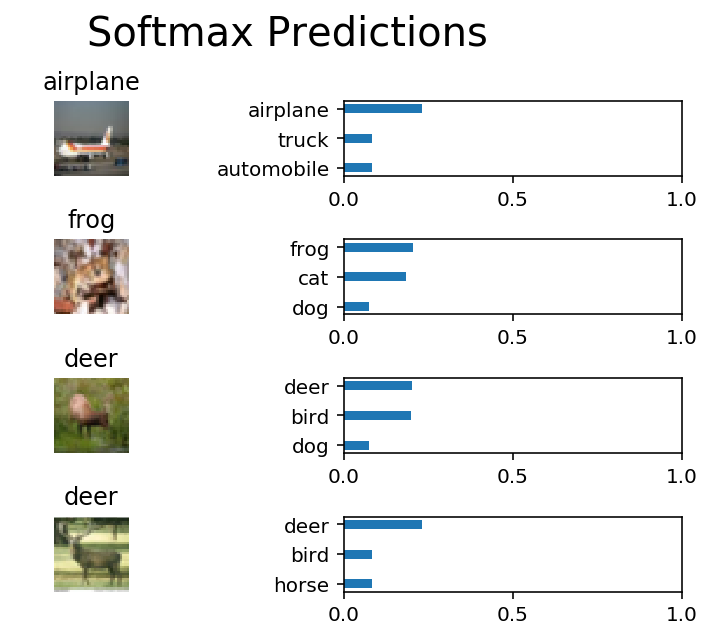

In [23]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.